## Eva Giannatou BAFT 1616
## Business	Analytics	Practicum
## Assignment	1	
## Setup		
The	objective	of	this	assignment	is	for	you	to	become	confortable	working	with	
Python	and	with	Pandas	in	particular.	As	discussed	in	class,	Pandas	is	a	
particularly	important	module	in	Python,	as	it	introduces	the	data	frame	
functionality	in	Python	and	together	with	numpy,	they	form	the	core	of	data	
processing	in	many	Python	analysis	workflows.		
## Questions		
There	are	three	questions	in	this	assignment	and	you	must	complete	all	three.	

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import re
import statistics
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import json

%matplotlib inline

## Question	1	(20	points)	
	
In	this	question	we	will	practice	writing	some	simple	functions	in	Python.	Please	
make	sure	you	provide	your	answer	to	each	sub-question	as	a	function	not	as	a	
series	of	python	statements,	and	it	would	be	useful	if	you	also	include	a	few		
Aexample	function	calls	in	each	case	that	demonstrate	that	your	function	works.	
I’d	recommend	you	consult	the	worked	Python	exercises	provided	with	the	labs	
to	help	guide	you.	

## 1A
Write	a	function	called	is_palindrome()	that	takes	in	a	single	string	
argument	and	returns	True	or	False	depending	on	whether	the	string	is	a	
palindrome	(i.e.	reads	the	same	backwards	e.g.	anna,	otto,	eye	etc...)	(5	
points)	

In [13]:
def is_palindrome(str):
    palindrome = str[::-1]
    if(palindrome==str):
        is_palindrome = True
    else:
        is_palindrome = False
    return is_palindrome

In [14]:
is_palindrome('lebal')

False

In [15]:
is_palindrome('abba')

True

## 1B
Write	a	function	that	takes	two	lists	of	equal	length	and	creates	a	set	of	all	
possible	tuples	where	the	first	element	is	from	the	first	list	and	the	second	
element	is	from	the	second	list	(5	points)	

**1st Solution**

In [16]:
# 1st solution
def list2tuple1(iterable_1, iterable_2):
  return list(zip(iterable_1, iterable_2))

In [17]:
odd = [1, 3, 5, 7, 9]
even = [2, 4, 6, 8, 10]

list2tuple1(odd, even)

[(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

In [18]:
colors1 = ['red', 'blue', 'green']
colors2 = ['black', 'yellow', 'orange']

list2tuple1(colors1, colors2)

[('red', 'black'), ('blue', 'yellow'), ('green', 'orange')]

**2nd Solution**

In [19]:
def list2tuple2(iterable_1, iterable_2):

    list3 = [zip(x, iterable_2) for x in itertools.permutations(iterable_1, len(iterable_2))]
    chain = itertools.chain(*list3)
    return list(set(chain))

In [20]:
a = [1, 2, 3]
b = [4, 5, 6]
list2tuple2(a,b)

[(2, 6), (1, 4), (1, 5), (1, 6), (3, 6), (2, 5), (3, 4), (2, 4), (3, 5)]

In [21]:
c = [1, 3, 5, 7]
d = ['red', 'blue', 'green']
list2tuple2(c,d)

[(5, 'red'),
 (1, 'blue'),
 (5, 'green'),
 (3, 'blue'),
 (3, 'green'),
 (1, 'green'),
 (3, 'red'),
 (7, 'green'),
 (7, 'red'),
 (5, 'blue'),
 (7, 'blue'),
 (1, 'red')]

## 1C
Write	a	function	that	takes	in	a	set	of	strings	and	computes	the	powerset,	
i.e.	the	set	of	all	possible	subsets	(include	the	empty	and	complete	set)	(5	
points)	

In [23]:
def powerset(s):
    lst = []
    for i in range(0,len(s)+1):
        subset = (set(itertools.combinations(s, i)))
        lst.append(subset)
    return lst

In [24]:
s = [1, 2, 3, 4]
powerset(s)

[{()},
 {(1,), (2,), (3,), (4,)},
 {(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)},
 {(1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)},
 {(1, 2, 3, 4)}]

## 1D
Write	a	function	that	takes	in	a	dictionary	whose	keys	are	strings	and	a	
regular	expression	and	returns	a	list	of	keys	from	the	dictionary	that	
match	that	regular	expression	(5	points)

In [28]:
def printkeys(string, regex):
    lst = []
    for key in dict:
      if regex.match(key):
          lst.append(key)

    return lst

In [29]:
dict={'param':None,'tourou':None,'1234':None, 'heym8':None, 'iscream4icecream':None}
regex = re.compile('^(?=.*[a-zA-Z])(?=.*[0-9])')

printkeys(dict, regex)

['heym8', 'iscream4icecream']

## Question	2	(28	points)		
	
In	this	question	we	will	practice	writing	some	simple	functions	in	Python.	Please	
make	sure	you	provide	your	answer	to	each	sub-question	as	a	function	not	as	a	
series	of	python	statements,	and	it	would	be	useful	if	you	also	include	a	few		
Aexample	function	calls	in	each	case	that	demonstrate	that	your	function	works.	
I’d	recommend	you	consult	the	worked	Python	exercises	provided	with	the	labs	
to	help	guide	you.	

This	question	uses	a	dataset	from	a	study	made	on	128	chimpanzees	living	in	
Gombe	National	Park,	Tanzania.	Here,	different	scientists	rated	the	behavioral	traits	
of	the	chimpanzees	across	24	personality	traits,	which	are	then	grouped	
into	the	six	broader	categories	of	dominance,	neuroticism,	openness,	
conscientiousness,	extraversion	and	agreeableness.	The	original	study	involved	
52	traits	but	the	data	files	contain	data	on	24.	

The	data	can	be	found	here: https://osf.io/s7d9d/	

Make	sure	you	download	this	file:	
	
* gombe_128.csv:	We	will	refer	to	this	as	the	summary	file.	It	has	a	row	for	
every	chimpanzee	with	the	summary	values	for	all	personality	traits.	
	
Load	the	summary	file	into	a	Pandas	data	frame,	calling	it	sumdf,	and	using	the	
relevant	Python	code,	answer	the	following	questions:

In [30]:
sumdf = pd.read_csv('gombe_128.csv')
sumdf = pd.DataFrame(sumdf)
sumdf.head(5)

,chimpcode,sex,kasekela,dom,sol,impl,symp,stbl,invt,depd,...,pred,conv,cool,innov,dominance,extraversion,conscientiousness,agreeableness,neuroticism,openness
0,E131,0,0.142857,2.428571,3.857143,3.000000,5.571429,4.285714,4.142857,4.285714,...,3.428571,4.285714,5.285714,4.000000,3.571429,4.642857,4.809524,5.047619,3.714286,3.642857
1,P70,1,1.000000,4.666667,3.333333,4.333333,4.666667,4.000000,2.666667,4.666667,...,5.333333,5.333333,3.666667,4.333333,4.888889,4.333333,4.222222,5.666667,4.000000,3.500000
2,G74,1,0.000000,3.333333,3.166667,3.500000,5.500000,5.166667,4.166667,5.666667,...,3.166667,3.333333,4.833333,4.666667,3.500000,4.750000,4.222222,5.222222,3.250000,3.875000
3,A364,0,0.000000,1.666667,1.333333,2.000000,2.666667,4.666667,3.333333,2.666667,...,4.000000,3.000000,4.333333,4.666667,3.777778,5.166667,5.222222,3.666667,3.333333,3.750000
4,B89,0,1.000000,3.000000,4.666667,3.000000,4.333333,2.666667,3.000000,5.000000,...,3.666667,3.333333,5.333333,5.333333,3.333333,4.250000,4.555556,4.111111,4.166667,3.833333


## 2A
What	is	the	difference	between	the	mean	and	median	values	of	the	
neuroticism	score?	HINT:	Use	the	PDF	file	in	the	site	to	determine	which	
column	has	which	trait.		(2	points)	

In [33]:
mean_neuroticism = statistics.mean(sumdf['neuroticism'])
median_neuroticism = statistics.median(sumdf['neuroticism'])
print("mean:", mean_neuroticism, ", median:", median_neuroticism, ", difference:", mean_neuroticism-median_neuroticism)

mean: 3.87709517102 , median: 3.833333333 , difference: 0.0437618380234


## 2B
How	many	chimpanzees	have	only	2	numerical	digits	in	their	code?	(2 points)


In [36]:
sumdf['chimpcode'][sumdf['chimpcode'].str.contains(r"^[A-Z][0-9]{2}$")].count()

21

## 2C
Are	there	any	chimpanzees	whose	code	consists	of	letters	earlier	than	‘S’	
in	the	alphabet	and	whose	numbers	are	all	even?	(2	points)	

In [37]:
sumdf['chimpcode'][sumdf['chimpcode'].str.contains(r"^[A-S][02468]{0,3}$")].count()

10

## 2D
What	is	the	average	difference	in	score	between	the	conventional	and	
decisive	traits?	(2	points)	

In [38]:
statistics.mean(abs(sumdf['conv'] - sumdf['decs']))

1.4657922753203125

## 2E
The	final	six	columns	(dominance	to	openness)	correspond	to	the	broad	
categories.	By	creating	any	relevant	data	frame	to	support	your	answer,	
which	of	these	six	broad	characteristics	is	most	prominent	among	female	
chimpanzees	in	the	sample,	and	which	was	most	prominent	among	the	
males	(assume	sex	=	0	corresponds	to	female)?	(4	points)	

In [40]:
c5 = sumdf.groupby('sex', as_index=False)[['dominance','extraversion','conscientiousness','agreeableness','neuroticism','openness']].mean()
c5

,sex,dominance,extraversion,conscientiousness,agreeableness,neuroticism,openness
0,0,3.804156,4.349256,4.691202,4.430595,3.580546,3.640692
1,1,4.220803,4.890041,4.161139,4.662747,4.258373,4.397894


In [45]:
# create a new row containing the difference between the average male and female characteristics
c5.loc[2] = abs(c5.iloc[0]-c5.iloc[1])
c5

,sex,dominance,extraversion,conscientiousness,agreeableness,neuroticism,openness
0,0.0,3.804156,4.349256,4.691202,4.430595,3.580546,3.640692
1,1.0,4.220803,4.890041,4.161139,4.662747,4.258373,4.397894
2,1.0,0.416646,0.540785,0.530062,0.232152,0.677827,0.757201


In [47]:
# return the maximum of each row
# and therefore the most prominent characteristic of females, of males, the characteristic 
# with the highest difference between females and males
c5.iloc[:,1:len(c5.columns)].idxmax(axis=1)

0    conscientiousness
1         extraversion
2             openness
dtype: object

**Answer:**
    The most prominent characteristic among female chimps is conscientiousness
    while the most prominent characteristic among male chimps is extraversion.
    The characteristic with the highest difference between males and females chimps is openness.
    Male chimps tend to have higher openness scores than females.

## 2F
The	columns	from	dom	to	innov	are	the	24	personality	traits.	You	can	see	
what	these	correspond	to	by	downloading	the	PDF	file	in	the	website.	
Create	a	dictionary	that	maps	personality	traits	to	the	number	of	
chimpanzees	for	which	that	trait	is	the	most	prominent	(i.e.	has	the	
highest	score).	For	example,	an	entry	{dom	:	5}	in	your	dictionary	would	
mean	that	there	are	five	chimpanzees	whose	most	prominent	trait	is	
dominance.	(6	points)

In [49]:
c6 = sumdf.iloc[:,0:len(sumdf.columns)-6].drop(['sex', 'kasekela'], axis=1)
c6 = c6.iloc[:,1:len(c6.columns)].idxmax(axis=1).value_counts()
c6 = c6.to_dict()
c6

{'actv': 8,
 'conv': 1,
 'cool': 8,
 'decs': 13,
 'depd': 7,
 'dom': 9,
 'exct': 2,
 'help': 16,
 'impl': 3,
 'indv': 2,
 'innov': 7,
 'inqs': 2,
 'pred': 1,
 'sens': 1,
 'soc': 29,
 'sol': 5,
 'stbl': 1,
 'symp': 13}

## 2G
Create	a	new	data	frame	in	the	long	data	format.	Specifically,	it	should	use	
the	chimpcode	column	as	an	index,	the	24	personality	columns	should	be	
represented	in	a	traits	column	and	their	corresponding	values	should	
appear	in	a	score	column	like	this:

|chimpcode		 |traits		|score    |
|----------------|--------------|---------|
|E131			 |dom			|2.428571 |	
|E131			 |sol			|3.857143 |	
| ...		     | ...		    | ...	  |	



This	data	frame	should	be	sorted	by	chimpcode.	(4	points)	


In [52]:
c7 = sumdf.iloc[:,0:len(sumdf.columns)-6].drop(['sex', 'kasekela'], axis=1)
c7 = c7.set_index('chimpcode').stack().sort_index()
c7.head(30)

chimpcode       
A100       actv     4.333333
           conv     3.000000
           cool     4.666667
           cur      2.000000
           decs     4.666667
           depd     3.333333
           dom      1.666667
           exct     1.666667
           help     3.333333
           impl     3.333333
           indv     4.000000
           innov    4.333333
           inqs     1.333333
           invt     3.333333
           pred     3.000000
           reckl    1.333333
           sens     3.333333
           soc      3.333333
           sol      5.666667
           stbl     3.666667
           symp     4.000000
           thotl    1.333333
           unem     5.000000
           vuln     3.000000
A341       actv     6.000000
           conv     2.600000
           cool     5.200000
           cur      5.600000
           decs     6.800000
           depd     3.600000
dtype: float64

## 2H
On	the	basis	of	the	24	personality	traits	alone,	which	pair	of	chimpanzees	
would	you	say	are	the	least	similar	to	each	other?	(6	points)

**1st Solution: Min similarity** 

In [55]:
c8 = sumdf.iloc[:,0:len(sumdf.columns)-6].drop(['sex', 'kasekela'], axis=1).set_index('chimpcode')
sim = cosine_similarity(c8)
test = list(divmod(sim.argmin(), sim.shape[1]))

print('Chimp with id =', c8.iloc[test,:].index.values[0], 'and chimp with id =', c8.iloc[test,:].index.values[1], 'are the least similar chimps')
print('Their characteristics are the following\n')
print(c8.iloc[test,:])

Chimp with id = H275 and chimp with id = H389 are the least similar chimps
Their characteristics are the following

                dom       sol      impl      symp  stbl      invt  depd  soc  \
chimpcode                                                                      
H275       3.000000  3.500000  2.500000  2.500000   3.0  3.500000   5.0  5.5   
H389       1.666667  4.666667  5.333333  3.666667   3.0  2.333333   3.0  2.0   

              thotl      help    ...     reckl  sens      unem  cur      vuln  \
chimpcode                        ...                                            
H275       1.500000  5.000000    ...       2.0   2.0  2.215066  2.0  3.500000   
H389       3.333333  2.333333    ...       3.0   3.0  3.000000  2.0  3.666667   

               actv  pred      conv      cool     innov  
chimpcode                                                
H275       2.000000   2.0  2.000000  3.000000  6.000000  
H389       5.666667   4.0  4.333333  2.666667  1.666667  

[2 ro

**2nd Solution: Max distance** 

In [56]:
sim = euclidean_distances(c8)
test = list(divmod(sim.argmax(), sim.shape[1]))

print('Chimp with id =', c8.iloc[test,:].index.values[0], 'and chimp with id =', c8.iloc[test,:].index.values[1], 'are the least similar chimps')
print('Their characteristics are the following\n')
print(c8.iloc[test,:])

Chimp with id = O468 and chimp with id = U376 are the least similar chimps
Their characteristics are the following

           dom       sol      impl      symp  stbl      invt      depd  \
chimpcode                                                                
O468       1.0  3.666667  5.333333  5.000000   5.0  4.000000  2.000000   
U376       7.0  1.333333  6.333333  4.333333   3.0  4.666667  4.333333   

                soc     thotl      help  ...       reckl      sens      unem  \
chimpcode                                ...                                   
O468       2.333333  1.666667  2.000000  ...    2.333333  5.333333  2.333333   
U376       6.666667  4.000000  6.333333  ...    3.333333  5.000000  2.666667   

           cur      vuln  actv      pred      conv      cool  innov  
chimpcode                                                            
O468       2.0  4.666667   3.0  3.878655  3.333333  4.000000    2.0  
U376       5.0  4.333333   5.0  5.333333  4.000000  6.33

## Question	3	(32	points)	
	
You	should	have	downloaded	the	second	dataset	that	we	will	use,	along	with	the	
instructions	to	this	assignment,	in	the	file	yelp_academic_dataset_business.json.	
This	contains	ratings	made	on	the	website	Yelp	(www.yelp.com)	for	15,585	
businesses	in	Arizona	in	the	United	States.	You	can	load	this	into	a	Pandas	data	
frame	by	executing	the	code	below.	Make	sure	you	include	this	snippet	in	your	
notebook:	
			

In [94]:
import json
yelp_file = 'yelp_academic_dataset_business.json'
yelp_rows = [json.loads(line) for line in
open(yelp_file)]
yelpdf = pd.DataFrame(yelp_rows)

Here	are	descriptions	for	some	of	the	fields:	
	
- business_id:	A	unique	id	for	the	business	
- attributes:	A	dictionary	with	different	attributes	
- categories:	Different	categories	for	this	business	
- city:	The	city	where	the	business	is	located	in	
- review_count:	How	many	reviews	have	been	made	for	this	business	
- latitude:	The	latitude	of	the	business	
- longitude:	The	longitude	of	the	business	
- stars:	The	average	star	rating	rounded	to	half-stars	
- full_address:	The	text	address	of	the	business	
	
Ok	now	for	some	questions:

## 3A
How	many	businesses	have	the	word	‘club’	anywhere	in	their	name	
(ignoring	case)	in	this	data	frame	(4	points)	

In [59]:
c1 = pd.DataFrame(yelpdf, columns = ['name'])
c1['name'][c1['name'].str.contains(r"\bclub\b", case = False)].count()

144

## 3B
The	basic	US	zip	code	format	has	5	digits.	You	can	spot	these	at	the	end	of	
most	entries	in	the	full_address	column.	How	many	entries	in	the	data	
frame	do	not	have	a	zip	code?		(4	points)

**1st Solution**

In [66]:
yelpdf['full_address'][~yelpdf['full_address'].str.contains(r"\b[0-9]{5}$\b")].count()

64

**2nd Solution**

In [68]:
filter = yelpdf['full_address'].str.contains('[0-9]{5}$')
yelpdf['full_address'][~filter].count()

64

## 3C
Remove	all	the	entries	in	the	data	frame	that	do	not	have	a	zip	code	and	
then	create	a	new	column	titled	zip_code	in	the	data	frame	by	extracting	
this	information	from	the	text	address	(4	points)	

In [80]:
patternDel = '[0-9]{5}$'
filter = yelpdf['full_address'].str.contains(patternDel)
c3 = yelpdf[filter]
c3.loc[:,'zip_code'] = pd.Series(c3['full_address'].str.findall(patternDel), index=c3.index).str[0]
c3.head(2)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,zip_code
0,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",O_X3PGhk3Y5JWVi866qlJg,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business,85023
1,"{'Parking': {'garage': False, 'street': False,...",QbrM7wqtmoNncqjc6GtFaQ,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business,85308


## 3D
Create	a	multi-level	index	on	this	data	frame	using	the	city,	zip_code	and	
then	business_id	columns	(2	points)	

In [81]:
c4 = c3.set_index(['city', 'zip_code', 'business_id'])
c4.head(2)

,,,attributes,categories,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
city,zip_code,business_id,,,,,,,,,,,,,
Phoenix,85023,O_X3PGhk3Y5JWVi866qlJg,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...","[Active Life, Arts & Entertainment, Stadiums &...","1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business
Glendale,85308,QbrM7wqtmoNncqjc6GtFaQ,"{'Parking': {'garage': False, 'street': False,...","[Tires, Automotive, Fashion, Shopping, Departm...","18501 N 83rd Avenue\nGlendale, AZ 85308",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business


## 3E
In	the	first	Pandas	notebook	in	class	we	saw	how	we	could	plot	data	when	
given	latitude	and	longitude	to	plot	taxi	rides.	In	particular,	we	met	a	
function	useful	for	doing	Mercator	projections	as	well	as	some	code	that	
uses	Matplotlib	to	plot	multiple	data	points	nicely	on	a	black	and	white	
map.		Use	this	code	to	plot	the	businesses	in	your	data	frame	using	the	
same	approach	taking	care	to	adjust	the	xlim	and	ylim	parameters	of	your	
plot	so	that	it	zooms	in	the	relevant	part	of	the	map.	HINT:	Examine	the	
range	of	your	converted	px	and	py	variables.	(6	points)	

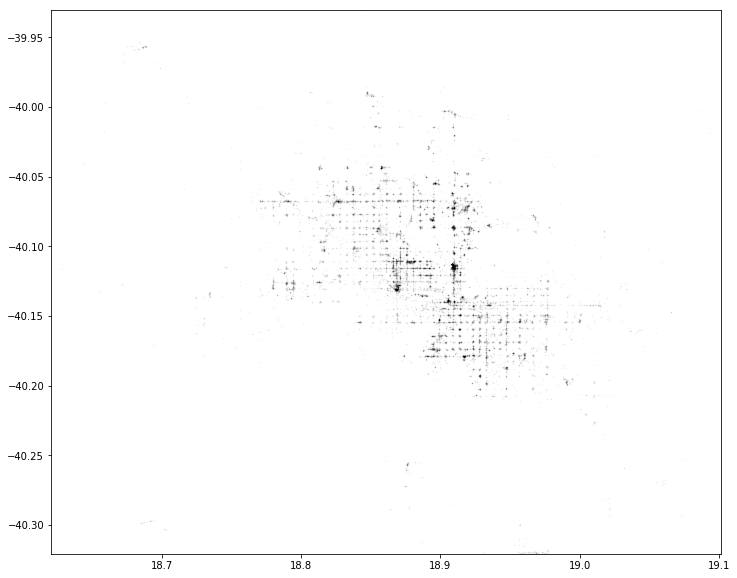

In [86]:
lng = c3.longitude
lat = c3.latitude

def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

px.min()
px.max()
py.min()
py.max()

plt.figure(figsize=(12, 10))
plt.axis('equal')
plt.xlim(18.628434722222224, 19.093456499999998)
plt.ylim(-40.320799566245469, -39.930537385207046)
#plt.axis('off')
plt.gca().set_facecolor('white')
plt.scatter(px, py, s=.4, alpha=.05, color='black')

## 3F
How	many	unique	categories	can	we	find	within	the	categories	column inside	this	data	frame?	(4	points)	

In [89]:
s = set()

for i in range(0, len(yelpdf['categories'])):

    for item in yelpdf['categories'][i]:
        s.add(item)

len(s)

591

## 3G
What	is	the	most	reviewed	business	with	the	“Pet”	category	(‘Bakeries’	category)	in	the	city	of	Phoenix?	(4	points)	

 <font color='red'> **I am not sure I have understood this question correctly**  </font> 

In [95]:
c7 = yelpdf
c7['categories'] = c7['categories'].apply(lambda x: ','.join(map(str, x)))

In [99]:
c7[(c7['city'] == 'Phoenix') & (c7['categories'].str.contains(r"\bBakeries\b", case = True))].groupby('name', as_index=False)[['review_count']].sum().max()

name            Willo Baking Company
review_count                     218
dtype: object

In [100]:
c7[(c7['city'] == 'Phoenix') & (c7['categories'].str.contains(r"\bPets\b", case = True))].groupby('name', as_index=False)[['review_count']].sum().max()

name            Your Dog Guru
review_count              102
dtype: object

In [101]:
c7[(c7['city'] == 'Phoenix') & (c7['categories'].str.contains(r"\bPet\b", case = True))].groupby('name', as_index=False)[['review_count']].sum().max()

name            Your Dog Guru
review_count              102
dtype: object

## 3H
Create	a	data	frame	that	counts	the	number	of	four-star-and-above	
businesses	per	city	in	your	data	frame	(4	points)	

In [103]:
yelpdf[(yelpdf['stars'] >=4)].groupby('city', as_index=False)[['name']].count()

,city,name
0,Ahwatukee,4
1,Anthem,17
2,Apache Junction,37
3,Arcadia,1
4,Avondale,82
5,Buckeye,16
6,Carefree,19
7,Casa Grande,21
8,Cave Creek,71
9,Chandler,584
